In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json, re

In [2]:
PRIOR_PATH = 'real_data/ac/1-survey__p1__ac-quiz-4gkv/product.json'

In [6]:
def load_json(path):
    with open(path) as file:
        return json.load(file)

def get_prior_knowledge(data):
    payload = data['payload']
    res = {k: v['data']['answersIndex'] for k, v in payload.items()}
    return pd.DataFrame(res, index=['q1', 'q2', 'q3', 'q4']).T

In [8]:
prior_data_dict = load_json(PRIOR_PATH)
prior_data = get_prior_knowledge(prior_data_dict)

,q1,q2,q3,q4
28AYQLYnkgBi5uKXN,0,0,0,0
2bcTjnfNuKp5hJcyK,0,1,1,1
53TwXKQe62kT2tnRp,0,0,0,0
Aw4gxBApCsdMueCwk,0,0,0,1
BMjGCT4wEQuYNyTiS,0,0,0,0
C23vEwAz5F76NjERx,0,0,0,1
Gv7QyY2nyFbAQadHu,0,0,1,1
NEJpZWwLZ4dzzvYh7,0,0,1,1
PqdvC3XWpMyWFqire,0,1,1,1
PrjgtRBCGbqJoZ3HN,0,1,1,1


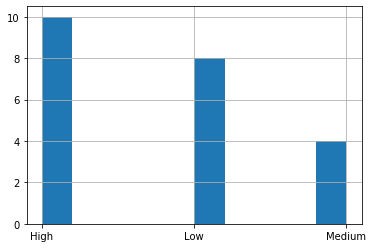

In [29]:
def prior_level(x):
    if x['q2'] == 0:
        if x['q3'] == 0:
            x['level'] = 'High'
        else:
            x['level'] = 'Medium'
    else:
        x['level'] = 'Low'
    return x

prior_data = prior_data.apply(prior_level, axis=1)
prior_data['level'].hist()

In [35]:
SPLIT_PATH = 'real_data/op/create-groups__op-create-groups-2mly/product.json'
split_dict = load_json(SPLIT_PATH)
split_dict = split_dict['socialStructure']['Split class into two groups']

In [48]:
def group(x, split_dict):
    if x.name in split_dict['1']:
        x['group'] = 1
    else:
        x['group'] = 2
    return x

prior_data = prior_data.apply(group, axis=1, args=[split_dict])
meta = prior_data[['level', 'group']]

In [67]:
meta

,level,group
28AYQLYnkgBi5uKXN,High,2
2bcTjnfNuKp5hJcyK,Low,1
53TwXKQe62kT2tnRp,High,2
Aw4gxBApCsdMueCwk,High,2
BMjGCT4wEQuYNyTiS,High,1
C23vEwAz5F76NjERx,High,2
Gv7QyY2nyFbAQadHu,Medium,1
NEJpZWwLZ4dzzvYh7,Medium,1
PqdvC3XWpMyWFqire,Low,2
PrjgtRBCGbqJoZ3HN,Low,1


In [63]:
pd.pivot_table(meta, index='level', columns='group', aggfunc=len)

group,1,2
level,,
High,4,6
Low,4,4
Medium,3,1


In [69]:
meta.to_csv('meta_data_student.csv', index_label='id')